In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sys
from pathlib import Path

# Add parent directory to path to import config
sys.path.append(str(Path().resolve().parent))
from config import DATA_DIR, PCA_13_COMPONENTS_PATH, PCA_9_COMPONENTS_PATH

data_folder = str(DATA_DIR) + "\\"

In [16]:
# Load the cleaned data for PCA analysis
from config import CLEANED_DATA_PATH
df = pd.read_csv(CLEANED_DATA_PATH)

print(f"Loaded data shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Loaded data shape: (720, 25)
Columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.5682451253481894', 'restecg_1.0', 'restecg_2.0', 'slope_1.7017543859649122', 'slope_2.0', 'slope_3.0', 'thal_4.985', 'thal_6.0', 'thal_7.0', 'ca_0.6807817589576547', 'ca_1.0', 'ca_2.0', 'ca_3.0']


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,...,slope_1.7017543859649122,slope_2.0,slope_3.0,thal_4.985,thal_6.0,thal_7.0,ca_0.6807817589576547,ca_1.0,ca_2.0,ca_3.0
0,1.209395,1.0,0.714115,0.262711,1.0,0.368628,0.0,1.422508,0,False,...,False,False,True,False,True,False,False,False,False,False
1,1.644777,1.0,1.525900,0.756016,0.0,-1.272402,1.0,0.669043,1,False,...,False,True,False,False,False,False,False,False,False,True
2,1.644777,1.0,-0.638861,0.225480,0.0,-0.451887,1.0,1.705057,1,False,...,False,True,False,False,False,True,False,False,True,False
3,-1.620589,1.0,-0.097671,0.420941,0.0,1.814297,0.0,2.552705,0,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.185207,0.0,-0.097671,-0.007211,0.0,1.228215,0.0,0.574860,0,True,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from sklearn.decomposition import PCA

# Drop target column and store separately
X = df.drop(columns=['target'])
y = df['target']

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)


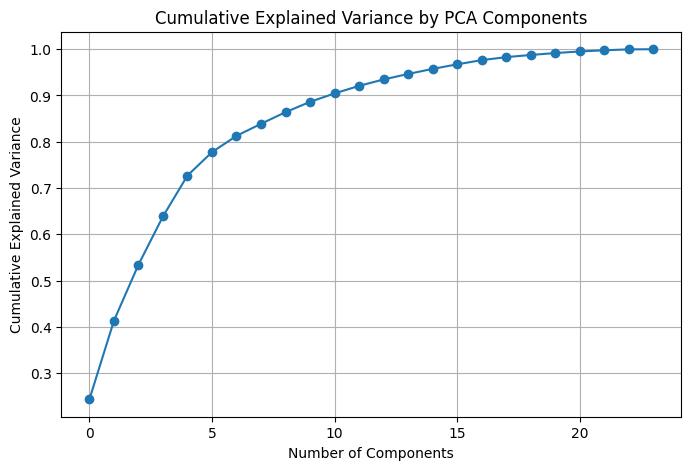

In [18]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


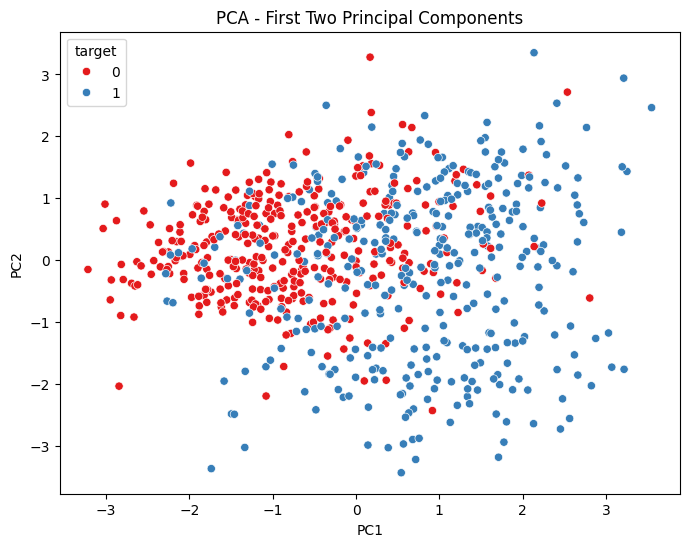

In [19]:
import seaborn as sns

# First 2 principal components
df_pca = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_pca['target'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA - First Two Principal Components')
plt.show()


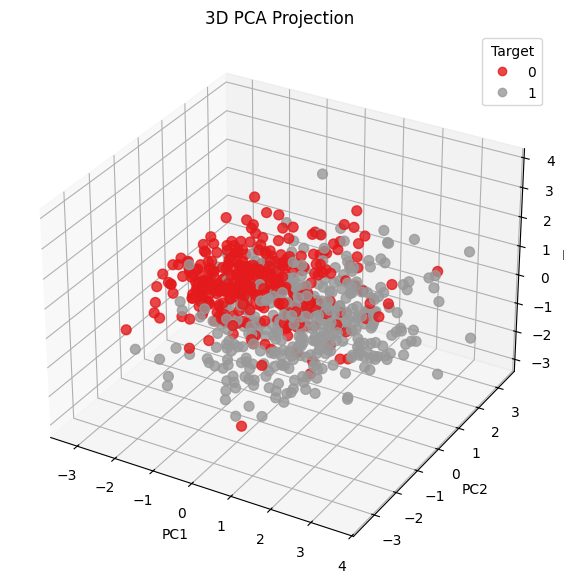

In [20]:
from mpl_toolkits.mplot3d import Axes3D


# First 3 PCs
pc_df = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
pc_df['target'] = y.values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pc_df['PC1'], pc_df['PC2'], pc_df['PC3'],
    c=pc_df['target'], cmap='Set1', s=50, alpha=0.8
)

ax.set_title('3D PCA Projection')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Target")
plt.show()

In [21]:
# Create DataFrame for modeling with 13 components
pca_features_13 = pd.DataFrame(X_pca[:, :13], columns=[f'PC{i+1}' for i in range(13)])
pca_features_13['target'] = y.values

# Save 13 components using config path
pca_features_13.to_csv(PCA_13_COMPONENTS_PATH, index=False)
print(f"✅ Saved 13 PCA components to {PCA_13_COMPONENTS_PATH}")

# Create DataFrame for modeling with 9 components
pca_features_9 = pd.DataFrame(X_pca[:, :9], columns=[f'PC{i+1}' for i in range(9)])
pca_features_9['target'] = y.values

# Save 9 components using config path
pca_features_9.to_csv(PCA_9_COMPONENTS_PATH, index=False)
print(f"✅ Saved 9 PCA components to {PCA_9_COMPONENTS_PATH}")

✅ Saved 13 PCA components to G:\Courses\Sprints_ML\Project\data\pca_13_components.csv
✅ Saved 9 PCA components to G:\Courses\Sprints_ML\Project\data\pca_9_components.csv
